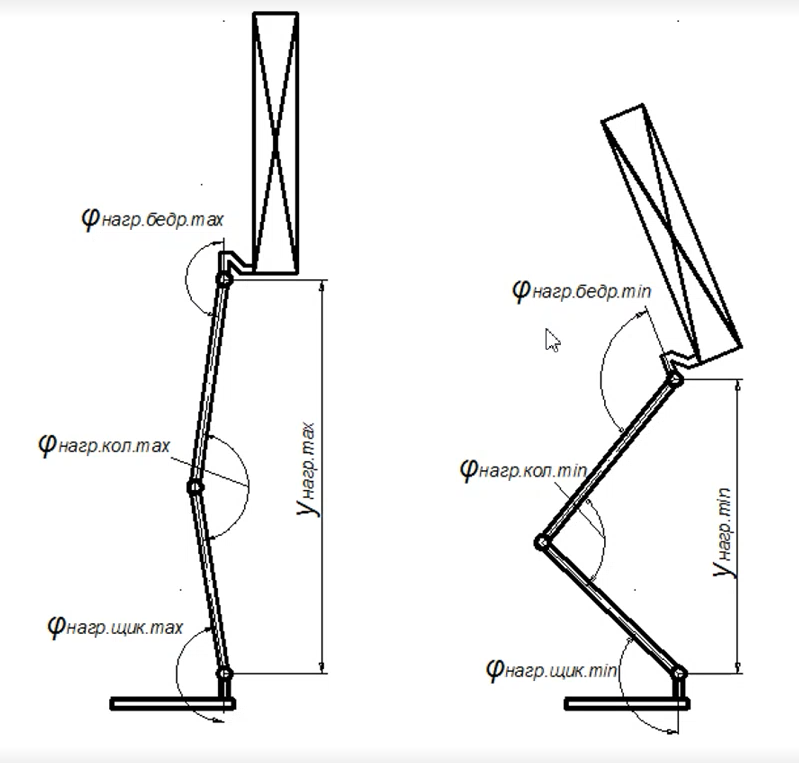

In [2]:
import math

from IPython.display import Image
import math
import matplotlib.pyplot as plt
import numpy as np
Image("data/img1.png")

In [3]:
period = 1.4
#Углы колена
phi_max = 163
phi_min = 95
y_min = 0.6
y_max = 0.85

In [50]:
def height(t: float, a: float, h0: float):
    omega = 2*math.pi*(1/period)
    return a*math.sin(omega*t) + h0
    # return a*math.sin(omega*t+math.pi/2) + h0

In [51]:
x = np.arange(0.0, period+0.05, 0.05)
y = []
for num in x:
    y.append(height(num, y_max-y_min, y_min))

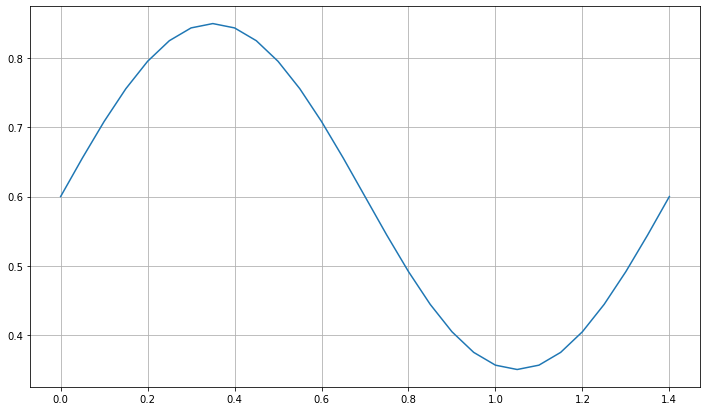

In [52]:
plt.figure(figsize=(12, 7))
plt.plot(x,y)
plt.grid()

In [7]:
def dheight(t: float, a: float):
    omega = 2*math.pi*(1/period)
    return a*math.cos(omega*t)*omega

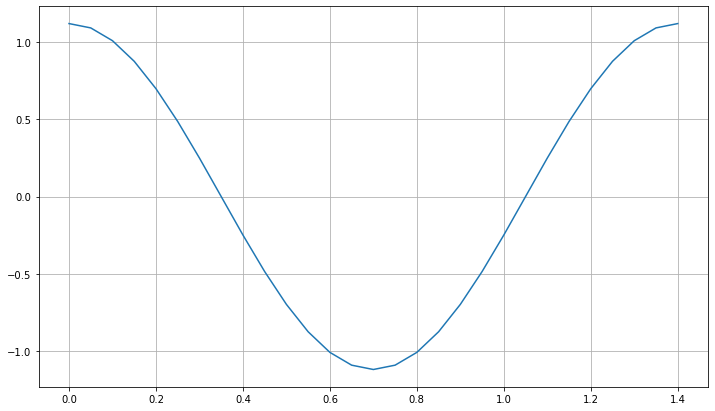

In [8]:
dy = []
for num in x:
    dy.append(dheight(num, y_max-y_min))
plt.figure(figsize=(12, 7))
plt.plot(x,dy)
plt.grid()

In [9]:
def ddheight(t: float, a: float):
    omega = 2*math.pi*(1/period)
    return -a*math.sin(omega*t)*omega*omega

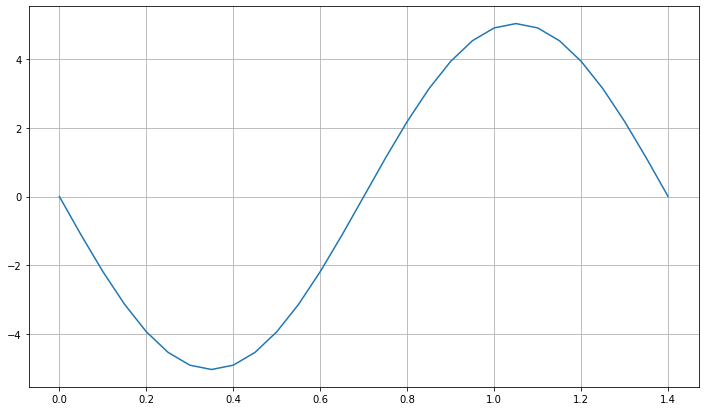

In [10]:
ddy = []
for num in x:
    ddy.append(ddheight(num, y_max-y_min))
plt.figure(figsize=(12, 7))
plt.plot(x,ddy)
plt.grid()

In [11]:
#Угол в сочленении, соответствующий определённому расстоянию между центрами  тазобедренного и голеностопного шарниров
#a,b - расстояния от коленного шарнира до коленного и бедренного шарниров (длины бедра и голени)
def phi(a: float, b: float, y: float):
    d = (a*a + b*b - y*y)/(2*a*b)
    print(d)
    if (-1 < d < 1):
        return math.acos(d)

0.4049586776859505
0.2895024742728205
0.17036187532697217
0.055631138228950015
-0.04587309739924573
-0.12566068872530733
-0.1766671913661116
-0.19421487603305754
-0.1766671913661116
-0.12566068872530733
-0.04587309739924573
0.055631138228950015
0.17036187532697236
0.2895024742728205
0.4049586776859508
0.5101843922460247
0.6006597984187652
0.6739681318078595
0.7294969678583044
0.7678621554754386
0.7902034653431347
0.7975206611570248
0.7902034653431347
0.7678621554754386
0.7294969678583042
0.6739681318078595
0.6006597984187652
0.510184392246025
0.40495867768595034


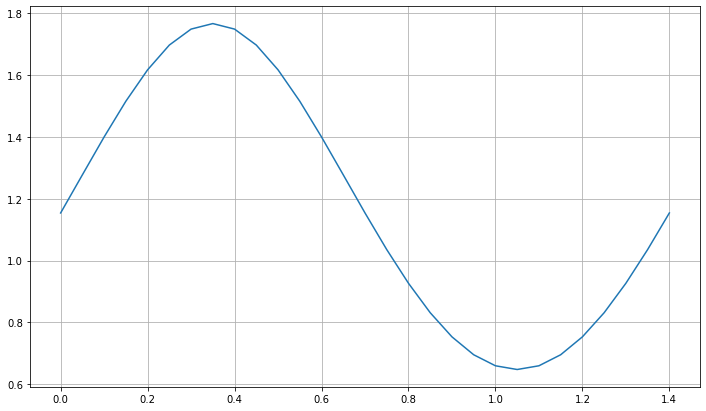

In [14]:
l1 = 0.55
l2 = 0.55

phis = []
for num in y:
    phis.append(phi(l1, l2, num))
plt.figure(figsize=(12, 7))
plt.plot(x,phis)
plt.grid()

In [15]:
def arm(a, b, p):
    if p is not None:
        return (a*b*math.sin(p))/(math.sqrt(a*a + b*b - 2*a*b*math.cos(p)))

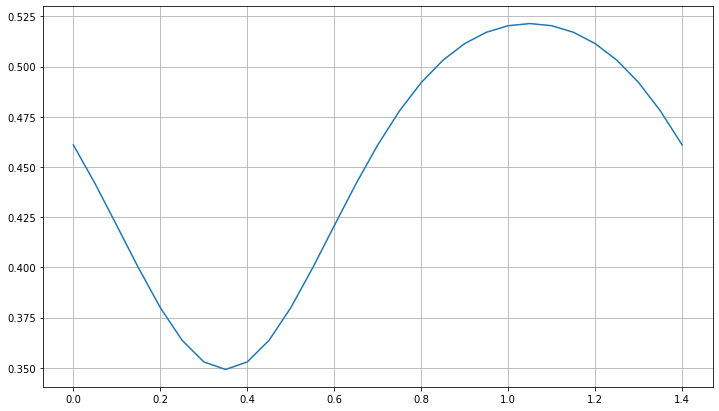

In [26]:
arms = []
for num in phis:
    arms.append(arm(l1, l2, num))
plt.figure(figsize=(12, 7))
plt.plot(x,arms)
plt.grid()

In [28]:
def dphi(r: float, dh: float):
    return dh/r

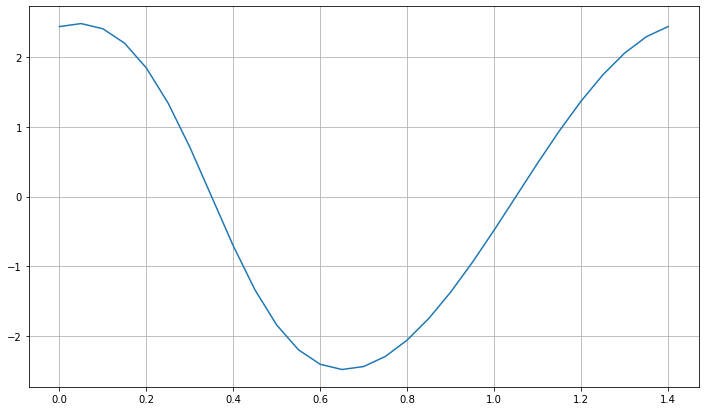

In [29]:
dphis = []
for i in range(len(arms)):
    dphis.append(dphi(arms[i], dy[i]))
plt.figure(figsize=(12, 7))
plt.plot(x,dphis)
plt.grid()

In [30]:
def p(m: float, ddy: float):
    return m*9.4 + m*ddy

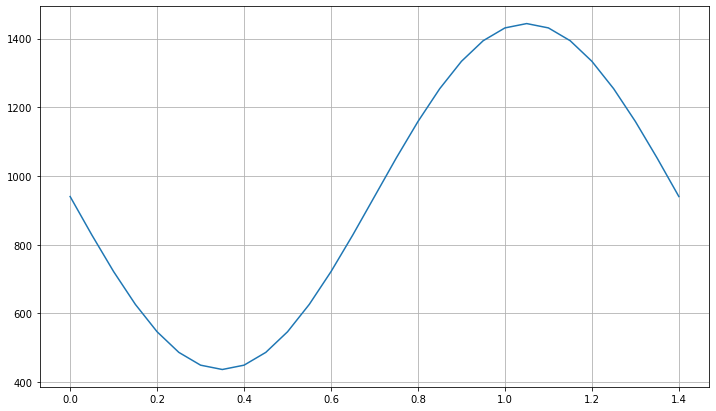

In [32]:
ps = []
mass = 100
for i in ddy:
    ps.append(p(mass, i))

plt.figure(figsize=(12, 7))
plt.plot(x,ps)
plt.grid()


In [33]:
def m(p: float, r: float):
    return p*r

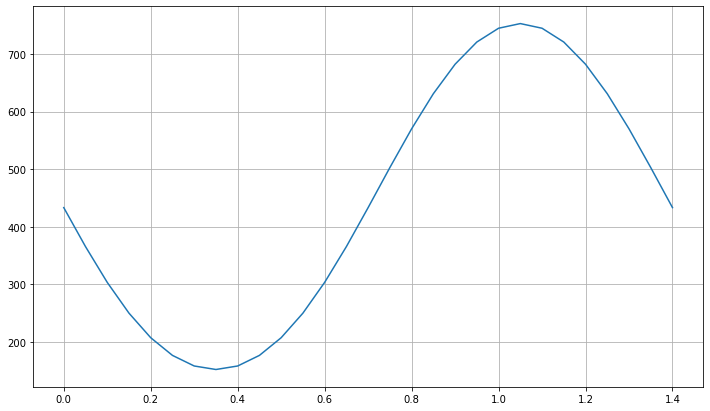

In [34]:
ms = []
for i in range(len(arms)):
    ms.append(m(ps[i], arms[i]))
plt.figure(figsize=(12, 7))
plt.plot(x,ms)
plt.grid()

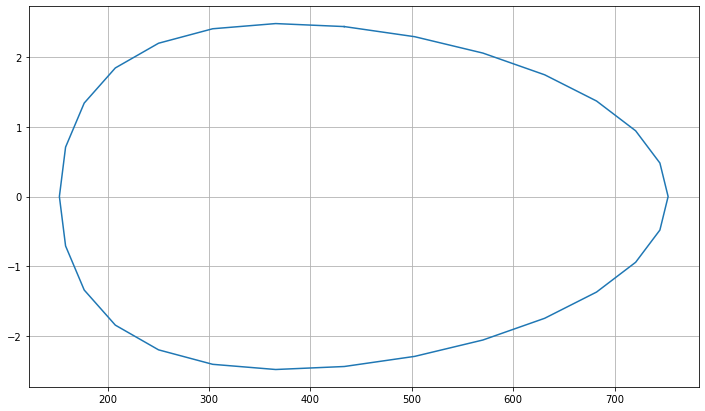

In [35]:
plt.figure(figsize=(12, 7))
plt.plot(ms,dphis)
plt.grid()

In [64]:
#Найти У по углу изменяющемуся по гармоническому закону
def find_y (angle: float, hypo: float):
    return 2* math.sin(angle/2)*hypo

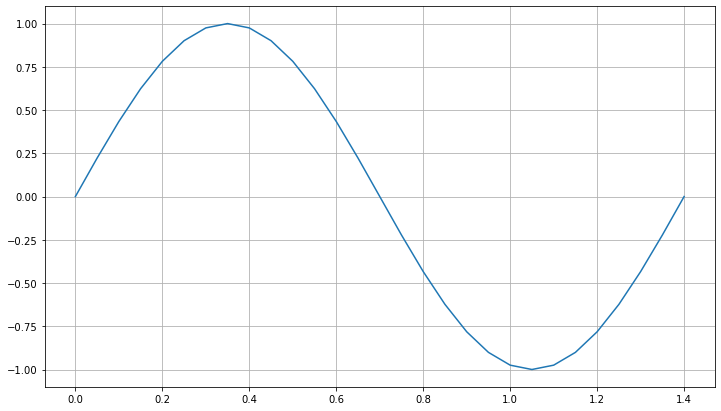

In [67]:
alpha = []
omega = 2 * math.pi * (1 / period)
ampl = 1
phase = 0
for num in x:
    alpha.append(ampl * math.sin(2 * math.pi * (1 / period) * num)+phase)

plt.figure(figsize=(12, 7))
plt.plot(x, alpha)
plt.grid()


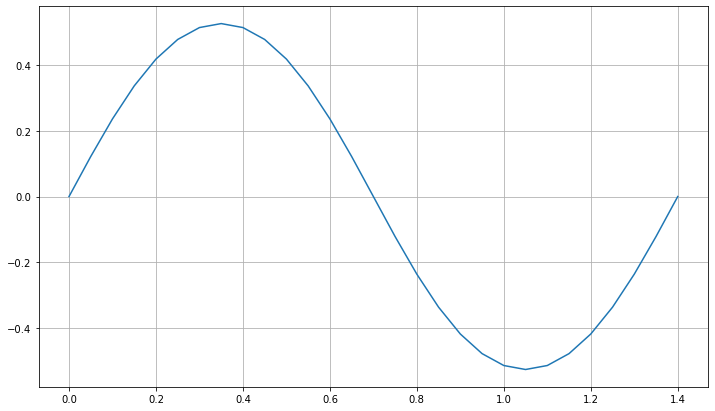

In [69]:
new_ys = []
for angle in alpha:
    new_ys.append(find_y(angle, l1))

plt.figure(figsize=(12, 7))
plt.plot(x, new_ys)
plt.grid()